# <img style="float: left; padding-right: 10px; width: 45px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> CS109A Introduction to Data Science: 

## Homework 3: Polynomial and LASSO Regression

**Harvard University**<br/>
**Fall 2021**<br/>
**Instructors**: Pavlos Protopapas and Natesh Pillai

<hr style="height:2.4pt">

In [1]:
# RUN THIS CELL 
import requests
from IPython.core.display import HTML
styles = requests.get(
    "https://raw.githubusercontent.com/Harvard-IACS/2021-CS109A/master/"
    "themes/static/css/cs109.css"
).text
HTML(styles)

### Import Libraries

In [2]:
from collections import Counter
import math

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.utils import shuffle

%matplotlib inline

<a id="instructions"></a>

<hr style="height:2pt">

### INSTRUCTIONS

- **THIS IS AN INDIVIDUAL ASSIGNMENT. Collaboration on this homework is NOT PERMITTED.**

- **THIS IS A TWO-WEEK HOMEWORK**. The material is indeed two-weeks-worth of work, so make sure you start it early!!!

- To submit your assignment follow the instructions given in Canvas.

- Please **restart the kernel and run the entire notebook again before you submit.**

- Running cells out of order is a common pitfall in Jupyter Notebooks. To make sure your code continues to work, restart the kernel and rerun your notebook periodically while working through this assignment. 

- We have tried to include all the libraries you may need to do the assignment in the imports cell provided below. **Please use only the libraries provided in those imports.**

- Please use `.head(...)` when viewing data. Do not submit a notebook that is **excessively long**. 

- In questions that require code to answer, such as "calculate and report $R^2$", do not just output the value from a cell. Write a `print(...)` function that clearly labels the output, includes a reference to the calculated value, and rounds it to a reasonable number of digits. **Do not hard code values in your printed output**. For example, this is an appropriate print statement:
```python
print(f'The R^2 is {R:.4f}')
```
- **Your plots MUST be clearly labeled and easy to read,** including clear labels for the $x$ and $y$ axes, a descriptive title ("MSE plot" is NOT a descriptive title; "95% confidence interval of coefficients for degree-5 polynomial model" on the other hand is descriptive), a legend when appropriate, and clearly formatted text and graphics.

- **Your code may also be evaluated for efficiency and clarity.** As a result, correct output is not always sufficient for full credit.

<hr style="height:2pt">

<a id="contents"></a>

## Notebook contents

- [**Overview and data description**](#intro)


- [**Question 1: Data visualization [5 pts]**](#part1)
  - [Solutions](#part1solutions)


- [**Your Homework 3 roadmap**](#roadmap)


- [**Question 2: Guesstimate the polynomial relationship [14 pts]**](#part2)
  - [Solutions](#part2solutions)


- [**Question 3: Use a validation set to find the most promising polynomial relationship [12 pts]**](#part3)
  - [Solutions](#part3solutions)


- [**Question 4: Finding the best model by k-fold cross validation [14 pts]**](#part4)
  - [Solutions](#part4solutions)


- [**Question 5: Finding the most consistent model using k-fold cross validation with bootstraps [16 pts]**](#part5)
  - [Solutions](#part5solutions)


- [**Question 6: Improving model consistency with LASSO regularization [33 pts]**](#part6)
  - [Solutions](#part6solutions)


- [**Question 7: Analyze your best test MSEs for each section of the homework [6 pts]**](#part7)
  - [Solutions](#part7solutions)

<a id="intro"></a>

## Overview and data description

[Return to contents](#contents)

### Predicting percentage change in bacteria populations given their spreading factor

In this homework, we will explore polynomial regression for predicting a quantitative variable. Specifically, we will build regression models that can predict the percentage change in bacteria population after 4 hours based on their "spreading factor". These prediction models can be useful in clustering of a novel bacteria to any class. 

If the percentage of change in population is positive, this indicates that the size of the bacteria population has grown. One important factor to note is that the percentage change could be negative. This indicates that within the specified time frame, the population of the bacteria has decreased from its original size.

The data set for this problem has already been split for you. You will find the train and test data sets in the files `data/bacteria_train.csv` and `data/bacteria_test.csv`, respectively. The first column in each file gives information about the change in percentage of the population and the second column contains the spreading factor of bacteria populations.


### Problem Description

We will predict the percentage change in population, given the spreading factor. For this exercise, we will consider the `Spreading_factor` to be our predictor variable and `Perc_population` to be our response variable. We will explore several different approaches, with mean squared error ($MSE$) as an evaluative criteria, for finding the best fit and most robust polynomial regression for modeling this relationship.


<a id="part1"></a>

## <div class='exercise'>Question 1: Data visualization [5 pts]</div> 
    
[Return to contents](#contents)
    
**1.1** Generate a scatter plot of the data points in the `bacteria_train.csv` file with the spreading factor on the $x$-axis and the percentage change on the $y$-axis.

**REMEMBER:** In this course, you will be expected to ALWAYS label your axes, title your graphs, and produce visuals that clearly communicate the data (as described in the [INSTRUCTIONS](#instructions) at the start of this notebook). Visuals should typically be accompanied by text identifying the key point of the visual and defending any choices you make as a data scientist regarding the visual to best communicate your data.

**1.2** Based on the graph, is there any discernable relationship between the spreading factor and percentage change in population?

<a id="part1solutions"></a>

## Question 1: Solutions

[Return to contents](#contents)

<div class='exercise-r'>

**1.1** Generate a scatter plot of the data points in the `bacteria_train.csv` file with the spreading factor on the $x$-axis and the percentage change on the $y$-axis.

**REMEMBER:** In this course, you will be expected to ALWAYS label your axes, title your graphs, and produce visuals that clearly communicate the data (as described in the [INSTRUCTIONS](#instructions) at the start of this notebook). Visuals should typically be accompanied by text identifying the key point of the visual and defending any choices you make as a data scientist regarding the visual to best communicate your data.

</div>

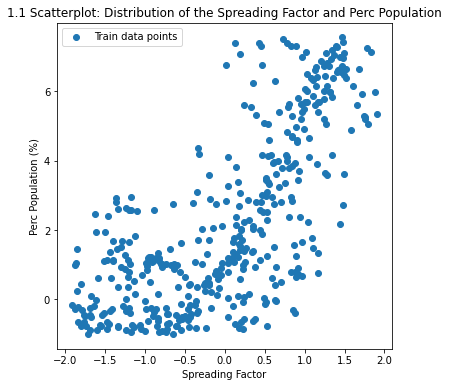

In [3]:
# your code here
df_train = pd.read_csv('data/bacteria_train.csv')
spread_train = df_train['Spreading_factor']
perc_train = df_train['Perc_population']

plt.figure(figsize = (6,6))
plt.scatter(spread_train,perc_train, label = "Train data points")
plt.title('1.1 Scatterplot: Distribution of the Spreading Factor and Perc Population')
plt.xlabel('Spreading Factor')
plt.ylabel('Perc Population (%)')
plt.legend()


<div class='exercise-r'>

**1.2** Based on the graph, is there any discernable relationship between the spreading factor and percentage change in population?

</div>

**your answer here**
It looks that as the spreading factor increases so does the Perc Population. They have a positive relationship. It looks like it could be a cubic or quadric function rather than a linear relationship.

<a id="roadmap"></a>

<hr style='height:2px'> 

## Your Homework 3 roadmap

[Return to contents](#contents)

**We will be following this roadmap for Question 2 through Question 6:**

![](data/soln-roadmap.png)


<a id="part2"></a>

## <div class='exercise'>Question 2: Guesstimate the polynomial relationship [14 pts]</div> 

[Return to contents](#contents)


**2.1** Guesstimate the degree of the polynomial regression that may best fit the data given our observation of the data in Question 1, and then fit that model following the requirements outlined below:
- Create a single dictionary called `best_mse_dict` to store the best test $MSE$s for each type of model we will be building in this notebook. The keys of this dictionary will be the question number, and the values will be the $MSE$ values. So, for this question, you will have `best_mse_dict["2.1"] = ...` .

- Generate `PolynomialFeatures(...)` for your guesstimated degree and fit a polynomial regression using scikit-learn's `LinearRegression(...)` on the training set.
- Generate a plot with both the train and test data, as well as your prediction curve.
- Compute and print the $MSE$ on the test set and save that value to `best_mse_dict`.
- Explain the rationale for your choice of degree (i.e. your "guesstimation") and comment on the fit of your model.
  
**2.2** Now we will compute confidence intervals for the coefficients generated in our model. For the same degree polynomial regression fit above in 2.1, compute and plot the 95% confidence interval of the beta (i.e. $\beta$) values obtained in that regression model. Be certain to meet these primary requirements:

- Report the coefficient values of the model fit above in 2.1.
- Use bootstrapping to generate your 95% confidence intervals by refitting your model to each bootstrapped sample of your training data (you can limit your number of bootstraps to 100).
- For each bootstrap, store the coefficients of the model, and use those stored coefficients to compute the $2.5$ and $97.5$ confidence bounds.
- Plot the bootstrapped coefficients as a grid of histograms, one histogram for each $\beta_i$, illustrating the distribution of bootstrapped coefficients for each $\beta_i$. Each distribution should indicate the regions of 95% confidence. Use `plt.subplots(...)` to arrange your histograms as a grid of plots.
- Comment on your findings.

**REMEMBER:** Bootstrapped samples should always be the same size as the original data and sampled with replacement.

<a id="part2solutions"></a>

## Question 2: Solutions

[Return to contents](#contents)

<div class='exercise-r'>

**2.1** Guesstimate the degree of the polynomial regression that may best fit the data given our observation of the data in Question 1, and then fit that model following the requirements outlined below:
- Create a single dictionary called `best_mse_dict` to store the best test $MSE$s for each type of model we will be building in this notebook. The keys of this dictionary will be the question number, and the values will be the $MSE$ values. So, for this question, you will have `best_mse_dict["2.1"] = ...` .

- Generate `PolynomialFeatures(...)` for your guesstimated degree and fit a polynomial regression using scikit-learn's `LinearRegression(...)` on the training set.
- Generate a plot with both the train and test data, as well as your prediction curve.
- Compute and print the $MSE$ on the test set and save that value to `best_mse_dict`.
- Explain the rationale for your choice of degree (i.e. your "guesstimation") and comment on the fit of your model.

</div>

In [4]:
# your code here
df_test = pd.read_csv('data/bacteria_test.csv')

x_train = df_train[['Spreading_factor']]
y_train = df_train['Perc_population']

x_test = df_test[['Spreading_factor']]
y_test = df_test['Perc_population']


best_mse_dict = {}
d = 3 # degree for polynomial 

#x_test = x_test.sort_values(['Spreading_factor'])

# Polynomial feature transform of the data set
x_poly_train = PolynomialFeatures(degree = d).fit_transform(x_train)
x_poly_test = PolynomialFeatures(degree = d).fit_transform(x_test)

# create linear regression
lr = LinearRegression(fit_intercept = False)
lr.fit(x_poly_train, y_train)

#Predict for both test and train
y_train_pred = lr.predict(x_poly_train)
y_test_pred = lr.predict(x_poly_test)

# Print MSE value for test
mse_test = mean_squared_error(y_test, y_test_pred)
best_mse_dict.update({'2.1': mse_test})

print(f"The best degree looks like degree {d} with an mse value of {mse_test:.3f}")

print(best_mse_dict)





The best degree looks like degree 3 with an mse value of 2.652
{'2.1': 2.6519056545149606}


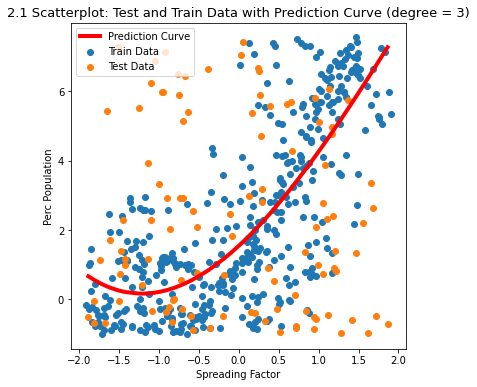

In [5]:
# Rerun my test with sort_values 
d = 3 # degree for polynomial 
x_test = x_test.sort_values(['Spreading_factor'])

x_poly_test = PolynomialFeatures(degree = d).fit_transform(x_test)


lr = LinearRegression(fit_intercept = False)
lr.fit(x_poly_train, y_train)

y_test_pred = lr.predict(x_poly_test)


# Plotting the figure
plt.figure(figsize = (6,6))
plt.plot(x_test,y_test_pred,'r-', linewidth = 4, label = 'Prediction Curve')
plt.scatter(x_train, y_train,label = 'Train Data')
plt.scatter(x_test, y_test, label = 'Test Data')
plt.xlabel("Spreading Factor")
plt.ylabel("Perc Population")
plt.title("2.1 Scatterplot: Test and Train Data with Prediction Curve (degree = 3)", fontsize = 13)
plt.legend()


**INTERPRETATION:**

**your answer here**
I choose degree 3 because the curve of the data looked cubic. 

<div class='exercise-r'>

**2.2** Now we will compute confidence intervals for the coefficients generated in our model. For the same degree polynomial regression fit above in 2.1, compute and plot the 95% confidence interval of the beta (i.e. $\beta$) values obtained in that regression model. Be certain to meet these primary requirements:

- Report the coefficient values of the model fit above in 2.1.
- Use bootstrapping to generate your 95% confidence intervals by refitting your model to each bootstrapped sample of your training data (you can limit your number of bootstraps to 100).
- For each bootstrap, store the coefficients of the model, and use those stored coefficients to compute the $2.5$ and $97.5$ confidence bounds.
- Plot the bootstrapped coefficients as a grid of histograms, one histogram for each $\beta_i$, illustrating the distribution of bootstrapped coefficients for each $\beta_i$. Each distribution should indicate the regions of 95% confidence. Use `plt.subplots(...)` to arrange your histograms as a grid of plots.
- Comment on your findings.

**REMEMBER:** Bootstrapped samples should always be the same size as the original data and sampled with replacement.

</div>

In [6]:
# Betas from above model
coef = lr.coef_
print(f"Here are the coefficients for my third degree polynomial from B0 to B3 {coef} with B0 as the intercept")

Here are the coefficients for my third degree polynomial from B0 to B3 [ 1.54499145  2.12338009  0.69422214 -0.09858653] with B0 as the intercept


Here is the beta1 confidence intervals (1.8183535568773865, 2.430750205913649)
Here is the beta2 confidence intervals (0.5392763756815488, 0.8662763927443107)
Here is the beta3 confidence intervals (-0.24819127463918683, 0.023751164505231626)


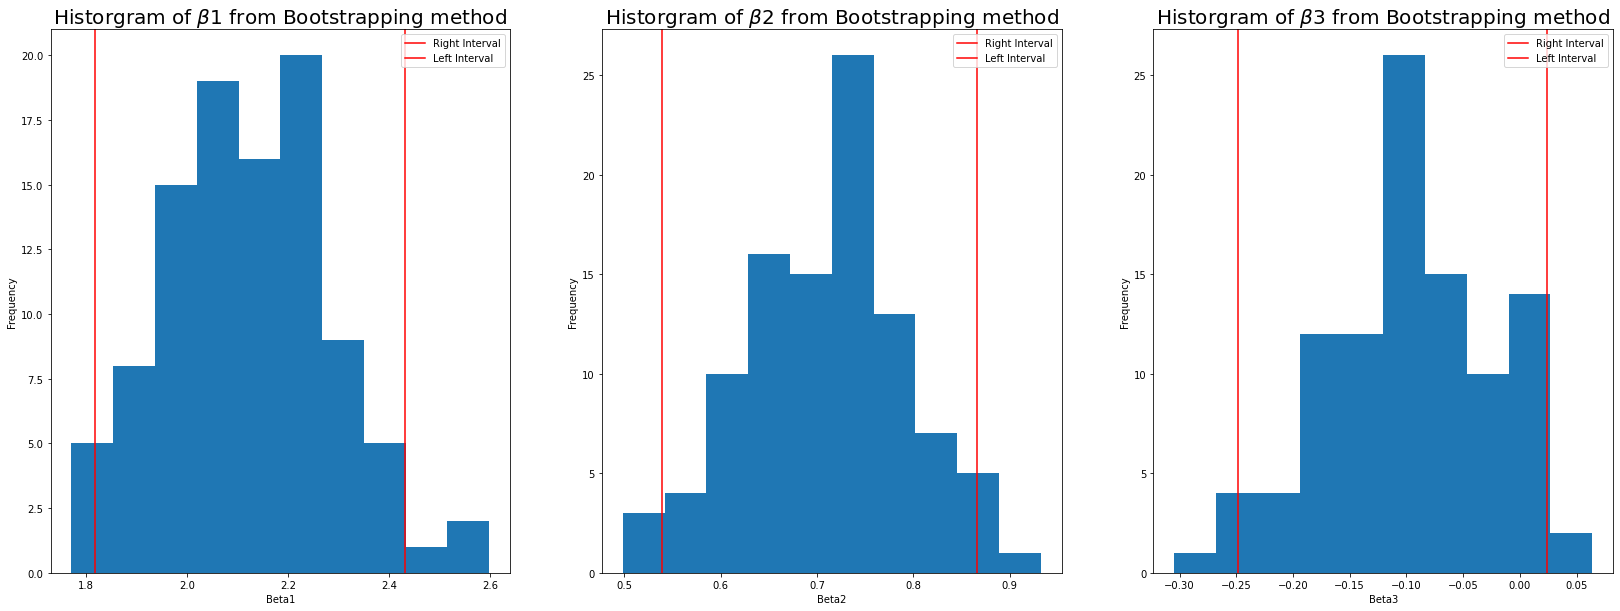

In [7]:
# your code here


# generating bootstrap method

#need to sample with replacement
def bootstrap(df_train):
    selectionIndex = np.random.randint(0,len(df_train), size = len(df_train))
    new_df = df_train.iloc[selectionIndex]
    return new_df



beta0_list, beta1_list, beta2_list, beta3_list = [], [], [], []

numboot = 100 

for i in range(numboot):
    d = 3
    
    #bootstrapping
    df_new = bootstrap(df_train)
    
    #polynomial fitting
    x_poly_train = PolynomialFeatures(degree = d).fit_transform(df_new[['Spreading_factor']])
    
    # Linear regression
    lr = LinearRegression(fit_intercept = False)
    lr.fit(x_poly_train, df_new['Perc_population'])
    y_train_pred = lr.predict(x_poly_train)
    
    #Appending each beta list
    new_coef = lr.coef_
    beta0_list.append(new_coef[0])
    beta1_list.append(new_coef[1])
    beta2_list.append(new_coef[2])
    beta3_list.append(new_coef[3])

    
    
beta0_list.sort(); # sort ascending
beta1_list.sort();
beta2_list.sort();
beta3_list.sort();

#beta0_CI = (np.percentile(beta0_list, 2.5), np.percentile(beta0_list,97.5))
beta1_CI = (np.percentile(beta1_list, 2.5), np.percentile(beta1_list, 97.5))
beta2_CI = (np.percentile(beta2_list, 2.5), np.percentile(beta2_list, 97.5))
beta3_CI = (np.percentile(beta3_list, 2.5), np.percentile(beta3_list, 97.5))
#print(f"Here is the beta0 confidence intervals {beta0_CI}")
print(f"Here is the beta1 confidence intervals {beta1_CI}")
print(f"Here is the beta2 confidence intervals {beta2_CI}")
print(f"Here is the beta3 confidence intervals {beta3_CI}")

betas = [beta0_list, beta1_list, beta2_list, beta3_list]

fig, ax = plt.subplots(1,3, figsize=(28,10))

# Previous graph for the intercept
# ax[0].hist(beta0_list)
# ax[0].axvline(beta0_CI[0], color = 'r', label = 'Right Interval')
# ax[0].axvline(beta0_CI[1], color = 'red', label = 'Left Interval')

ax[0].hist(beta1_list)
ax[0].axvline(beta1_CI[0], color = 'r', label = 'Right Interval')
ax[0].axvline(beta1_CI[1], color = 'red', label = 'Left Interval')

ax[1].hist(beta2_list)
ax[1].axvline(beta2_CI[0], color = 'r', label = 'Right Interval')
ax[1].axvline(beta2_CI[1], color = 'red', label = 'Left Interval')

ax[2].hist(beta3_list)
ax[2].axvline(beta3_CI[0], color = 'r', label = 'Right Interval')
ax[2].axvline(beta3_CI[1], color = 'red', label = 'Left Interval')

for i in range(0,3):
    ax[i].set_xlabel(f'Beta{i+1}')
    ax[i].set_ylabel("Frequency")
    ax[i].set_title(fr"Historgram of $\beta${i+1} from Bootstrapping method", fontsize = 20)
    ax[i].legend()
    




### Class code for CI
def plot_simulation(simulation,confidence): \
   * plt.hist(simulation, bins = 30, label = 'beta distribution', align = 'left', density = True) \
   * plt.axvline(confidence[1], 0, 1, color = 'r', label = 'Right Interval') \
   * plt.axvline(confidence[0], 0, 1, color = 'red', label = 'Left Interval') \
   * plt.xlabel('Beta value') \
   * plt.ylabel('Frequency') \
   * plt.title('Confidence Interval')\
   * plt.legend(frameon = False, loc = 'upper right')\
    
plot_simulation(beta0_list, beta0_CI)

**INTERPRETATION:**

**your answer here**
For each time the cell is run, the graphs change. The overall variance looks to stay the same. Beta1 stays between a range of 1.7 and 2.44. Beta2 stays between a range of 0.544 and 0.84. Beta3 stays between a range of -0.23 and 0.04

<a id="part3"></a>

## <div class='exercise'>Question 3: Use a validation set to find the most promising polynomial relationship [12 pts]</div> 

[Return to contents](#contents)

**3.1** Find the best degree polynomial relationship using a single validation set. Be certain to meet the requirements outlined below:

- Split your training data such that you separate out a single 20% validation split.
- Fit polynomial regression models up to **degree 30** on the 80% training set (one model for each degree polynomial regression).
- Generate a single plot illustrating the train and validation $MSE$ values for each fitted degree polynomial regression model.
- Compare the validation $MSE$ values and select and report the degree for which the validation error is lowest.


**3.2** Now, with the best degree selected, train the polynomial regression on the **complete training set** (including the observations that you had previously removed to make the validation set). Report the train and test $MSE$ and add the test $MSE$ to `best_mse_dict`.


**3.3** Generate a plot of the data and your regression curve (similar to [Question 2.1](#part2)). Comment on how your model fits the data and compare it to the fit of your "guesstimated" model from [Question 2](#part2solutions).

<a id="part3solutions"></a>

## Question 3: Solutions

[Return to contents](#contents)

<div class='exercise-r'>

**3.1** Find the best degree polynomial relationship using a single validation set. Be certain to meet the requirements outlined below:

- Split your training data such that you separate out a single 20% validation split.
- Fit polynomial regression models up to **degree 30** on the 80% training set (one model for each degree polynomial regression).
- Generate a single plot illustrating the train and validation $MSE$ values for each fitted degree polynomial regression model.
- Compare the validation $MSE$ values and select and report the degree for which the validation error is lowest.

</div>

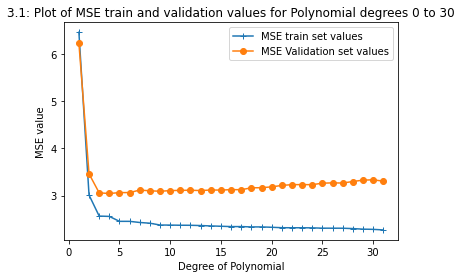

Here is the lowest value of MSE for the validation set: 3.044 occurring at degree 3


In [8]:
# your code here

X = df_train[["Spreading_factor"]]
y = df_train["Perc_population"]

xtrain, xval, ytrain, yval = train_test_split(X,y, train_size = 0.8, random_state = 0)
MSE_train = []
MSE_val = []

d_list = np.linspace(1,31,31) 


for i in range(len(d_list)):
    #training the data
    x_poly_train = PolynomialFeatures(degree = i).fit_transform(xtrain)
    x_poly_val = PolynomialFeatures(degree = i).fit_transform(xval)
    
    # Linear regression
    lr = LinearRegression(fit_intercept = False)
    lr.fit(x_poly_train, ytrain)
    
    # Predictions
    y_train_pred = lr.predict(x_poly_train)
    y_val_pred = lr.predict(x_poly_val)
    
    
    #Create MSE scores and append them
    mse_train = mean_squared_error(ytrain, y_train_pred)
    MSE_train.append(mse_train)
    
    mse_val = mean_squared_error(yval, y_val_pred)
    MSE_val.append(mse_val)

#very different scales
plt.figure()
plt.plot(d_list, MSE_train, '+-' ,label = "MSE train set values")
plt.plot(d_list, MSE_val,'o-' ,label = "MSE Validation set values")
plt.legend()
plt.title("3.1: Plot of MSE train and validation values for Polynomial degrees 0 to 30")
plt.xlabel("Degree of Polynomial")
plt.ylabel("MSE value")
#plt.axis([0,30,0,100]) # setting size to best see lowest validation
plt.show()

low_mse = min(MSE_val)
index = MSE_val.index(low_mse)


print(f"Here is the lowest value of MSE for the validation set: {low_mse:.3f} occurring at degree {index}")



<div class='exercise-r'>

**3.2** Now, with the best degree selected, train the polynomial regression on the **complete training set** (including the observations that you had previously removed to make the validation set). Report the train and test $MSE$ and add the test $MSE$ to `best_mse_dict`.

</div>

In [9]:
# your code here
xtrain = df_train[["Spreading_factor"]]
ytrain = df_train["Perc_population"]

xtest = df_test[["Spreading_factor"]]
ytest = df_test["Perc_population"]

#xtest = xtest.sort_values(['Spreading_factor'])

d = 3
#training the data
x_poly_train = PolynomialFeatures(degree = d).fit_transform(xtrain)
x_poly_test = PolynomialFeatures(degree = d).fit_transform(xtest)


# Linear regression
lr = LinearRegression(fit_intercept = False)
lr.fit(x_poly_train, ytrain)

y_train_pred = lr.predict(x_poly_train)
y_test_pred = lr.predict(x_poly_test)

train_mse = mean_squared_error(ytrain, y_train_pred)
test_mse = mean_squared_error(ytest, y_test_pred)

print(f"Here is the train MSE: {train_mse:.3f}")
print(f"Here is the test MSE: {test_mse:.3f}")


best_mse_dict.update({'3.2': test_mse})

print(best_mse_dict)
 

Here is the train MSE: 2.653
Here is the test MSE: 2.652
{'2.1': 2.6519056545149606, '3.2': 2.6519056545149606}


<div class='exercise-r'>

**3.3** Generate a plot of the data and your regression curve (similar to [Question 2.1](#part2)). Comment on how your model fits the data and compare it to the fit of your "guesstimated" model from [Question 2](#part2solutions).

</div>

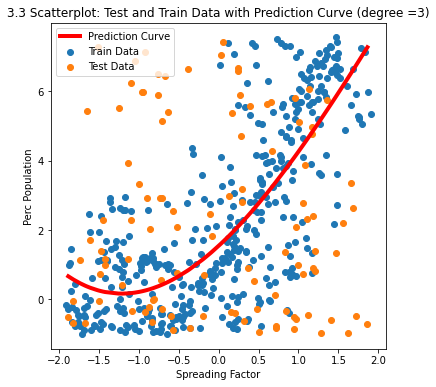

In [10]:
# your code here

xtrain = df_train[["Spreading_factor"]]
ytrain = df_train["Perc_population"]
xtest = df_test[["Spreading_factor"]]
ytest = df_test["Perc_population"]


# sort values to help the plot
xtest = xtest.sort_values(['Spreading_factor'])

d = 3
#training the data
x_poly_train = PolynomialFeatures(degree = d).fit_transform(xtrain)
x_poly_test = PolynomialFeatures(degree = d).fit_transform(xtest)


# Linear regression
lr = LinearRegression(fit_intercept = False)
lr.fit(x_poly_train, ytrain)

y_train_pred = lr.predict(x_poly_train)
y_test_pred = lr.predict(x_poly_test)

train_mse = mean_squared_error(ytrain, y_train_pred)
test_mse = mean_squared_error(ytest, y_test_pred)


# Plot figures
plt.figure(figsize = (6,6))
plt.plot(xtest,y_test_pred,'r-', linewidth = 4, label = 'Prediction Curve')
plt.scatter(xtrain, y_train,label = 'Train Data')
plt.scatter(xtest, y_test, label = 'Test Data')
plt.xlabel("Spreading Factor")
plt.ylabel("Perc Population")
plt.title("3.3 Scatterplot: Test and Train Data with Prediction Curve (degree =3)")
plt.legend()



**INTERPRETATION:**

**your answer here**

With random seed 0, the guesstimated degree is the same as the one predicted as the model. If it is changed to a different random seed, then it is possible that it can change and there be a difference between the guess and model prediction.


<a id="part4"></a>

## <div class='exercise'>Question 4: Finding the best model by k-fold cross validation [14 pts]</div> 

[Return to contents](#contents)

**4.1** In this part we find the best degree polynomial regression by running the model on a range of degree values and using k-fold cross validation on the `bacteria_train.csv` dataset.

- Use scikit-learn's `cross_validate(...)` to perform cross validation with `k=10` for each degree polynomial regression up to **degree 30**.
- Generate a single plot showing the mean train and validation $MSE$ values (see note below) for each degree polynomial regression, including the +/- 1 standard deviation bounds for the validation $MSE$ values. Comment on trends and findings illustrated by your plot.
- Print the degree of the best model, identified based on the lowest mean validation $MSE$, along with the corresponding mean train and validation $MSE$ values.

**NOTE:** When we refer to train and validation $MSE$ values here in Question 4.1 and in future problems where we are performing cross validation, we are referring specifically to the cross-validation generated train and validation $MSE$ values. Just please remember, when accessing your validation $MSE$ values while performing cross validation with scikit-learn's `cross_validate(...)`, scikit-learn rather confusingly refers to its validation scores as `test_score` in the dictionary that it returns, even though those values are actually validation scores. Please see the `cross_validate(...)` [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html) for more info on this function.

**4.2** Fit the best model on the entire training data and report the $MSE$.

- For the best degree polynomial regression identified in Question 4.1 above, train on the complete training set from the `bacteria_train.csv` file and predict on the test data.
- Report the coefficients of the model.
- Report both the training and test $MSE$ values, and save the **test** $MSE$ to `best_mse_dict`.


**4.3** Generate a plot of the data and your regression curve (similar to [Question 2.1](#part2)). Comment on how your model fits the data and how your model compares relative to the prior best-fit model you generated using just a single validation set in [Question 3](#part3solutions).


<a id="part4solutions"></a>

## Question 4: Solutions

[Return to contents](#contents)

<div class='exercise-r'>

**4.1** In this part we find the best degree polynomial regression by running the model on a range of degree values and using k-fold cross validation on the `bacteria_train.csv` dataset.

- Use scikit-learn's `cross_validate(...)` to perform cross validation with `k=10` for each degree polynomial regression up to **degree 30**.
- Generate a single plot showing the mean train and validation $MSE$ values (see note below) for each degree polynomial regression, including the +/- 1 standard deviation bounds for the validation $MSE$ values. Comment on trends and findings illustrated by your plot.
- Print the degree of the best model, identified based on the lowest mean validation $MSE$, along with the corresponding mean train and validation $MSE$ values.

**NOTE:** When we refer to train and validation $MSE$ values here in Question 4.1 and in future problems where we are performing cross validation, we are referring specifically to the cross-validation generated train and validation $MSE$ values. Just please remember, when accessing your validation $MSE$ values while performing cross validation with scikit-learn's `cross_validate(...)`, scikit-learn rather confusingly refers to its validation scores as `test_score` in the dictionary that it returns, even though those values are actually validation scores. Please see the `cross_validate(...)` [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html) for more info on this function.

</div>

In [11]:
# your code here

x_train = df_train[["Spreading_factor"]]
y_train = df_train["Perc_population"]


#xtrain, xval, ytrain, yval = train_test_split(X,y, train_size = 0.8, random_state = 1)
MSE_train = []
MSE_val = []
std_train = []
std_val = []



k = 10 


for i in range(0,31):
    #training the data
    x_poly_train = PolynomialFeatures(degree = i).fit_transform(xtrain)
    
    # Linear regression
   # lr = LinearRegression(fit_intercept = False)
    #lr.fit(x_poly_train, ytrain)
   # y_train_pred = lr.predict(x_poly_train)


    mse_train_score = cross_validate(lr,x_poly_train,ytrain,scoring = "neg_mean_squared_error",cv = k, return_train_score = True) 
    # if True gives two lists where it has test_score (validation) & train score
    MSE_train.append(mse_train_score["train_score"].mean()*-1)
    MSE_val.append(mse_train_score["test_score"].mean()*-1)
    
    #storing STD values
    std_train.append(mse_train_score["train_score"].std())
    std_val.append(mse_train_score["test_score"].std())



low_mse = min(MSE_val)
index = MSE_val.index(low_mse)
print(f"The minimum MSE from the Validation data is {low_mse:.3f} at degree {index}")

print(f"The corresponding MSE value from the train data at degree {index} is {MSE_train[index]:.3f}")


The minimum MSE from the Validation data is 2.599 at degree 8
The corresponding MSE value from the train data at degree 8 is 2.508


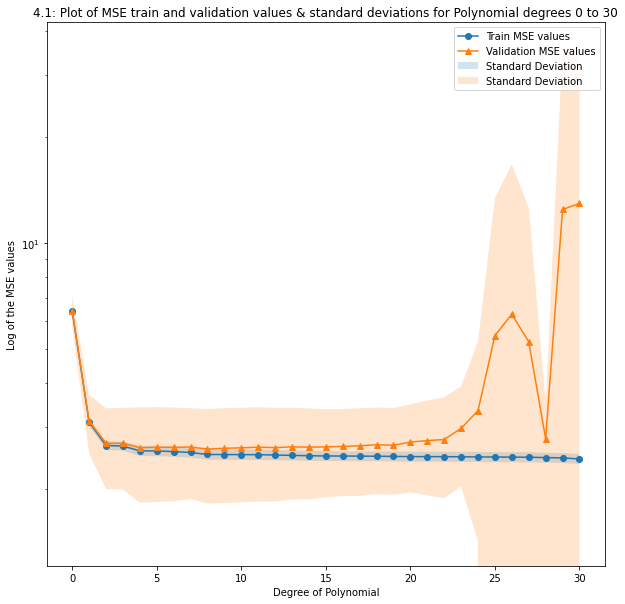

In [12]:
# Plotting the graph
MSE_train = np.array(MSE_train)
MSE_val = np.array(MSE_val)
std_val = np.array(std_val)
std_train = np.array(std_train)



#Plotting the figure
plt.figure(figsize = (10,10))
plt.plot(np.arange(0,31), MSE_train, 'o-',label = "Train MSE values")
plt.plot(np.arange(0,31), MSE_val,'^-' ,label = "Validation MSE values")



plt.fill_between(np.arange(0,31), MSE_train + std_train, MSE_train - std_train ,label = "Standard Deviation", alpha = 0.2)
plt.fill_between(np.arange(0,31), MSE_val + std_val, MSE_val - std_val ,label = "Standard Deviation", alpha = 0.2)

plt.title("4.1: Plot of MSE train and validation values & standard deviations for Polynomial degrees 0 to 30")
plt.xlabel("Degree of Polynomial")
plt.ylabel("Log of the MSE values")
plt.yscale("log")
plt.legend()



**INTERPRETATION:**

**your answer here**
For degrees 0 to 20, it looks pretty similar but it is difficult to interpret due to the logscale. There is a noticeable jump in MSE values from degree 21 to 26, which probably means that overfitting can occur here. The standard deviation of MSE values is much smaller for the train data vs the test data which makes sense because we fit the model on the train data.

<div class='exercise-r'>

**4.2** Fit the best model on the entire training data and report the $MSE$.

- For the best degree polynomial regression identified in Question 4.1 above, train on the complete training set from the `bacteria_train.csv` file and predict on the test data.
- Report the coefficients of the model.
- Report both the training and test $MSE$ values, and save the **test** $MSE$ to `best_mse_dict`.

</div>

In [13]:
# your code here

xtrain = df_train[["Spreading_factor"]]
ytrain = df_train["Perc_population"]
xtest = df_test[["Spreading_factor"]]
ytest = df_test["Perc_population"]

#xtest = xtest.sort_values(['Spreading_factor'])

d = 8  # Best from 4.1
k = 10 

#training the data
x_poly_train = PolynomialFeatures(degree = d).fit_transform(xtrain)
x_poly_test = PolynomialFeatures(degree = d).fit_transform(xtest)


# Linear regression
lr = LinearRegression(fit_intercept = False)
lr.fit(x_poly_train, ytrain)

y_train_pred = lr.predict(x_poly_train)
y_test_pred = lr.predict(x_poly_test)


#Creating Mse score
train_mse = mean_squared_error(ytrain, y_train_pred)
test_mse = mean_squared_error(ytest, y_test_pred)

coeff = lr.coef_

print(fr"The coefficients beta0 to beta7 from the model using degree 8 are: {coeff} with beta0 as the intercept")


print(f"MSE value from train data {train_mse:.3f}")
print(f"MSE value from test data {test_mse:.3f}")


best_mse_dict.update({"4.2": test_mse})
#print(best_mse_dict)

The coefficients beta0 to beta7 from the model using degree 8 are: [ 1.53533357  2.59702778 -1.09486847 -1.18913441  3.48314914  0.65287664
 -1.71300787 -0.11530516  0.24041837] with beta0 as the intercept
MSE value from train data 2.513
MSE value from test data 2.613


<div class='exercise-r'>

**4.3** Generate a plot of the data and your regression curve (similar to [Question 2.1](#part2)). Comment on how your model fits the data and how your model compares relative to the prior best-fit model you generated using just a single validation set in [Question 3](#part3solutions).

</div>

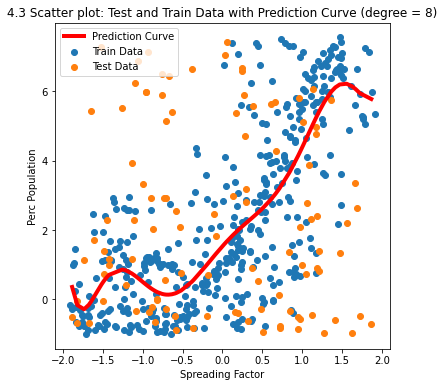

In [14]:
# your code here
xtrain = df_train[["Spreading_factor"]]
ytrain = df_train["Perc_population"]
xtest = df_test[["Spreading_factor"]]
ytest = df_test["Perc_population"]

xtest = xtest.sort_values(['Spreading_factor'])

d = 8  # Best from 4.1
k = 10 

#training the data
x_poly_train = PolynomialFeatures(degree = d).fit_transform(xtrain)
x_poly_test = PolynomialFeatures(degree = d).fit_transform(xtest)


# Linear regression
lr = LinearRegression(fit_intercept = False)
lr.fit(x_poly_train, ytrain)

y_train_pred = lr.predict(x_poly_train)
y_test_pred = lr.predict(x_poly_test)


#Creating Mse score
train_mse = mean_squared_error(ytrain, y_train_pred)
test_mse = mean_squared_error(ytest, y_test_pred)




#Plot figure 
plt.figure(figsize = (6,6))
plt.plot(xtest,y_test_pred,'r-', linewidth = 4, label = 'Prediction Curve')
plt.scatter(xtrain, y_train,label = 'Train Data')
plt.scatter(xtest, y_test, label = 'Test Data')
plt.xlabel("Spreading Factor")
plt.ylabel("Perc Population")
plt.title("4.3 Scatter plot: Test and Train Data with Prediction Curve (degree = 8)")
plt.legend()



**INTERPRETATION:**

**Comment on how your model fits the data and how your model compares relative to the prior best-fit model you generated using just a single validation set in Question 3.**

This graph looks to overfitted to the data because the best polynomial to train was increased to 8 whereas it used to be 3. The best degree was changed because of the use of cross validation, which creates 10 validation and train scenarios to take multiple interpretations of the data. 


<a id="part5"></a>

## <div class='exercise'>Question 5: Finding the most consistent model using k-fold cross validation with bootstraps [16 pts]</div> 

[Return to contents](#contents)

**5.1** In the previous part, we used $k$-fold cross validation to find the best model. But how confident are you of your estimated best degree? We have already used bootstraps in [Question 2.2](#part2) to estimate the confidence intervals of our $\beta_i$ values. In this segment, we will use bootstrapping to test the robustness of our estimation. As before, we use the `bacteria_train.csv` data to train the model and `bacteria_test.csv` to test the model.

- Similar to Question 2.2, run **at least 100 bootstraps** of your data.
- For each bootstrap:
  - Use scikit-learn's `cross_validate(...)` to perform cross validation with `k=10` for each degree polynomial regression up to **degree 30**.
  - Select the best cross-validated degree polynomial regression based on lowest mean validation $MSE$ and store that best degree to a list.
- After completing your bootstraps, you should have a list of "best degree" numbers, one degree for each completed bootstrap.
- Generate a bar plot, with the polynomial degree on the $x$-axis and the number of times that degree was deemed best on the $y$-axis, using the “best degree” numbers saved during your bootstraps.

**NOTE:** Once complete, your code for this problem will likely take several minutes to execute. This is to be expected.

**5.2** What are your observations? 

- Why do you see so much variation in the "best degree" over the bootstraps?
- Which degree polynomial regression will you choose as your overall best degree based on your bootstrapped results, and why? 

**5.3** Now, with the overall best degree identified with your bootstrapping results above, train the polynomial regression model on the **complete training set**. Report both the training and test $MSE$ values, and save the **test** $MSE$ to `best_mse_dict`.

**5.4** Generate a plot of the data and your regression curve (similar to [Question 2.1](#part2)). Comment on how your model fits the data and compare it to the fit of your cross-validated model from [Question 4](#part4solutions).

<a id="part5solutions"></a>

## Question 5: Solutions

[Return to contents](#contents)

<div class='exercise-r'>

**5.1** In the previous part, we used $k$-fold cross validation to find the best model. But how confident are you of your estimated best degree? We have already used bootstraps in [Question 2.2](#part2) to estimate the confidence intervals of our $\beta_i$ values. In this segment, we will use bootstrapping to test the robustness of our estimation. As before, we use the `bacteria_train.csv` data to train the model and `bacteria_test.csv` to test the model.

- Similar to Question 2.2, run **at least 100 bootstraps** of your data.
- For each bootstrap:
  - Use scikit-learn's `cross_validate(...)` to perform cross validation with `k=10` for each degree polynomial regression up to **degree 30**.
  - Select the best cross-validated degree polynomial regression based on lowest mean validation $MSE$ and store that best degree to a list.
- After completing your bootstraps, you should have a list of "best degree" numbers, one degree for each completed bootstrap.
- Generate a bar plot, with the polynomial degree on the $x$-axis and the number of times that degree was deemed best on the $y$-axis, using the “best degree” numbers saved during your bootstraps.

**NOTE:** Once complete, your code for this problem will likely take several minutes to execute. This is to be expected.

</div>

In [15]:
# your code here


#need to sample with replacement
def bootstrap(df_train):
    selectionIndex = np.random.randint(0,len(df_train), size = len(df_train))
    new_df = df_train.iloc[selectionIndex]
    return new_df


numboot = 100 
d = 30

 
best_degree = []

for i in range(0,numboot+1):
    df_new = bootstrap(df_train)
    lr = LinearRegression(fit_intercept = False)
    xtrain = df_new[["Spreading_factor"]]
    ytrain = df_new[["Perc_population"]]

    #print(f"We are at degree {d}")
    mse_test = []    
   
    for d in range(0,d+1):  
        #print(f"We are at bootstrap {i}")
        x_poly_train = PolynomialFeatures(degree = d).fit_transform(xtrain)
        mse_test_score = cross_validate(lr,x_poly_train,ytrain,scoring = "neg_mean_squared_error",cv = 10)
        mse_test.append(mse_test_score["test_score"].mean()*-1)
    #print(mse_test)
        
    best_mse = min(mse_test)
    index = mse_test.index(best_mse)
    best_degree.append(index)
   
   

In [16]:
#print(best_degree)

best_deg = {}
for i in range(0,31):
    best_deg[i] = 0
    
for i in best_degree:
    best_deg[i] = best_degree.count(i)  # in order to get actual counts to better plot the figure

No handles with labels found to put in legend.


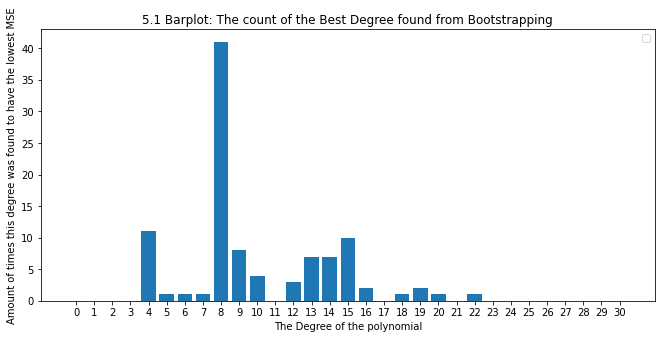

In [17]:
plt.figure(figsize = (11,5))
plt.bar(best_deg.keys(), best_deg.values())
plt.title("5.1 Barplot: The count of the Best Degree found from Bootstrapping")
plt.xticks(np.arange(0,31))
plt.xlabel("The Degree of the polynomial")
plt.ylabel("Amount of times this degree was found to have the lowest MSE")
plt.legend()

#print(best_degree)

<div class='exercise-r'>

**5.2** What are your observations? 

- Why do you see so much variation in the "best degree" over the bootstraps?
- Which degree polynomial regression will you choose as your overall best degree based on your bootstrapped results, and why? 


</div>

**your answer here**
The degree with the highest count of low MSE values is 8. There is so much variation because with bootstraps it is creating new sample data each time with replacement, and the data could be extremely affected. I would choose degree 8 as the overall best value because it has almost double the count then any degree from the bootstrapped results.

<div class='exercise-r'>

**5.3** Now, with the overall best degree identified with your bootstrapping results above, train the polynomial regression model on the **complete training set**. Report both the training and test $MSE$ values, and save the **test** $MSE$ to `best_mse_dict`.

</div>

In [18]:
# your code here
d = 8

xtrain = df_train[["Spreading_factor"]]
ytrain = df_train["Perc_population"]

xtest = df_test[["Spreading_factor"]]
ytest = df_test["Perc_population"]

#xtest = xtest.sort_values(['Spreading_factor'])

x_poly_train = PolynomialFeatures(degree = d).fit_transform(xtrain)
x_poly_test = PolynomialFeatures(degree = d).fit_transform(xtest)

lr = LinearRegression(fit_intercept = False)
lr.fit(x_poly_train,ytrain)

y_train_pred = lr.predict(x_poly_train)
y_test_pred = lr.predict(x_poly_test)


train_mse = mean_squared_error(ytrain, y_train_pred)
test_mse = mean_squared_error(ytest, y_test_pred)

coeff = lr.coef_

print(fr"The coefficients beta0 to beta7 from the model using degree 8 are: {coeff} with beta0 as the intercept")


print(f"MSE value from test data {train_mse:.3f}")
print(f"MSE value from train data {test_mse:.3f}")


best_mse_dict.update({'5.3': test_mse})


The coefficients beta0 to beta7 from the model using degree 8 are: [ 1.53533357  2.59702778 -1.09486847 -1.18913441  3.48314914  0.65287664
 -1.71300787 -0.11530516  0.24041837] with beta0 as the intercept
MSE value from test data 2.513
MSE value from train data 2.613


In [19]:
print(best_mse_dict)

{'2.1': 2.6519056545149606, '3.2': 2.6519056545149606, '4.2': 2.61301063735301, '5.3': 2.61301063735301}


<div class='exercise-r'>

**5.4** Generate a plot of the data and your regression curve (similar to [Question 2.1](#part2)). Comment on how your model fits the data and compare it to the fit of your cross-validated model from [Question 4](#part4solutions).

</div>

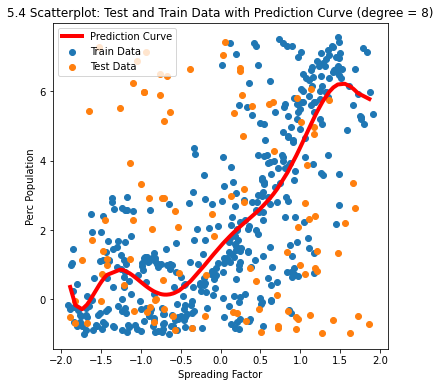

In [20]:
# your code here
d = 8

#need to rerun with the sorted data

xtrain = df_train[["Spreading_factor"]]
ytrain = df_train["Perc_population"]

xtest = df_test[["Spreading_factor"]]
ytest = df_test["Perc_population"]

xtest = xtest.sort_values(['Spreading_factor'])

x_poly_train = PolynomialFeatures(degree = d).fit_transform(xtrain)
x_poly_test = PolynomialFeatures(degree = d).fit_transform(xtest)

lr = LinearRegression(fit_intercept = False)
lr.fit(x_poly_train,ytrain)

y_train_pred = lr.predict(x_poly_train)
y_test_pred = lr.predict(x_poly_test)


train_mse = mean_squared_error(ytrain, y_train_pred)
test_mse = mean_squared_error(ytest, y_test_pred)


#Plot figure
plt.figure(figsize = (6,6))
plt.plot(xtest,y_test_pred,'r-', linewidth = 4, label = 'Prediction Curve')
plt.scatter(xtrain, y_train,label = 'Train Data')
plt.scatter(xtest, y_test, label = 'Test Data')
plt.xlabel("Spreading Factor")
plt.ylabel("Perc Population")
plt.title("5.4 Scatterplot: Test and Train Data with Prediction Curve (degree = 8)")
plt.legend()



**INTERPRETATION:**

**Generate a plot of the data and your regression curve (similar to Question 2.1). Comment on how your model fits the data and compare it to the fit of your cross-validated model from Question 4.**

I get the same graph as the one in question 4. This makes sense because cross validation is iterating through the data multiple times, which is a similar process to creating new samples within bootstraping. 


<a id="part6"></a>

## <div class='exercise'>Question 6: Improving model consistency with LASSO regularization [33 pts]</div> 

[Return to contents](#contents)

In the previous sections, we compared many polynomial models to find the best degree. For each model of degree $n$, we considered all polynomial coefficients *up to* **degree $n$** using `PolynomialFeatures(...)`. In this section we will consider polynomial features of $n=30$, and a **best model** that could be chosen from any possible combination of our 30 degrees.

For instance, we could choose a best model with an arbitrary set of polynomial degrees up degree 30, such as $x^i \in [x^1, x^5, x^{19}, x^{24}]$, rather than the standard approach of using *all* consecutive degrees up to our maximum degree $n=30$ as in $x^i \in [x^0, x^1, ... , x^{30}]$.

However, the total number of such possible models for $n=30$ is $2^{30}\approx10^9$, and searching through all of them would be laborious and computationally inefficient. Instead, we can use $LASSO$ (i.e. $L1$) regularization, which "switches off" highly unstable degree coefficients by shrinking them to zero (or very close to zero), thus giving us an efficient solution to this particular combinatorial challenge.

**6.1 Find the best hyper-parameter alpha, $\alpha$**

First, we will use cross validation to find the the best regularization parameter $\alpha$. As before, we use the `bacteria_train.csv` for cross validation.

- Use polynomial features with **degree 30**. 
- For each regularization parameter $\alpha$ in $\alpha \in [10^{-3}, 10^{-2}, 10^{-1}, 10^{0}, 10^{1}]$, perform scikit-learn's `Lasso(...)` regression using `cross_validate(...)` with `k=10`.
- Do not worry about normalizing your $x$ values for any parts of Question 6. It will not meaningfully affect our final results here.
- Generate a single plot showing the mean train and validation $MSE$ values for each regularization parameter $\alpha$, including the +/- 1 standard deviation bounds for the validation $MSE$ values.
- Print the best $\alpha$ value, identified based on the lowest mean validation $MSE$, along with the corresponding mean train and validation $MSE$ values.
- Did your $LASSO$ regression model generate any warnings while solving this problem? If so, what was that warning, what did it mean, what steps did you take to address the cause of this warning, and why might it be important to take those steps? (See the [NOTE](#part6note) at the bottom of Question 6 for some hints.)


**6.2 Find the most significant degrees**

From the previous section, you will now have the `best_alpha` hyperparameter. Now, we will use this best $\alpha$ value to find the "most significant" set of polynomial degrees by using bootstraps.

What we mean by this is, for each bootstrap of the data, you will get some set of degrees that are **significant**, as will be indicated by the value of their coefficients. Typically, while using $LASSO$ regularization, we would consider $\mid\beta_i\mid \gt 0$ as an indication of a particular coefficient's significance. However, for this particular exercise, we are going to use $\mid\beta_i\mid \gt 0.1$ as our criteria for significance (we have found this $0.1$ threshold to work well when designing this particular problem).

Based on this criteria, you will identify which degree coefficients are significant over many bootstrapped iterations with $n=30$ polynomial features and your chosen best $\alpha$ from Question 6.1.

- Use polynomial features with **degree 30**.
- Use a dictionary called `significant_degrees` to store a cumulative count for each degree identified as significant during your bootstraps.
- Run at least 100 bootstraps of your data.
- For each bootstrap:
  - Train a `Lasso(...)` model with the `best_alpha` identified in Question 6.1.
  - Identify the significant polynomial degree coefficients using $\mid\beta_i\mid \gt 0.1 $ as our threshold for significance.
  - For each significant coefficient, update the count of that degree in your `significant_degrees` dictionary.
- Generate a bar plot showing the count for each degree, showing how many times it was identified as significant over your bootstraps.
- Based on this plot, there should likely be a clear maximum degree, above which, few if any iterations have been identified as significant. Interpret your bar plot, choose a maximum degree polynomial based upon it, and explain your rationale for choosing that degree.


**6.3 Compute and print the test $MSE$**

From our Question 6.2 results, we can see that only some degrees are consistently significant over many bootstraps. You will now retrain the $L1$ regularized model on the entire **training** data and find the test $MSE$.

- Use polynomial features based on the maximum degree you identified using your results from Question 6.2 (for the sake of simplicity, use all degrees up to that maximum degree as is typically done in polynomial regression).
- Train your **LASSO** regularized model using your `best_alpha` hyper-parameter on the entire training set.
- Generate a plot of the data and your regression curve (similar to [Question 2.1](#part2)).
- Report the polynomial degrees and corresponding coefficients for this fully trained model that have an absolute value greater than 0.1 (i.e. $\mid\beta_i\mid \gt 0.1 $).
- Report the train and test $MSE$ and save the test $MSE$ to `best_mse_dict`.

**6.4 What are your observations?**

- Compare your `best_degree` from [Question 5](#part5solutions) with your chosen degree in 6.3 above and comment on the difference.
- Compare your test $MSE$ in this question with the result from question 5. Which one is smaller, and by how much?
- Which degree coefficients in your best fit model from 6.3 are significant? If not all coefficients are significant, why?
- Would you expect your current model from 6.3 to be more "reliable" or robust than the models in Question 5 and prior? On what basis would you make a claim of its robustness?

<a id="part6note"></a>

**NOTE:**
- Once complete, your code for 6.1 and 6.2 will likely take several minutes to execute. This is to be expected.
- You will also likely receive `ConvergenceWarning` messages as your $LASSO$ regression models are trained.
  - Try resolving this warning by increasing your $LASSO$ models' maximum iterations by between 20-times to 100-times greater than scikit-learn's default number of iterations for its `Lasso(...)` implementation.
  - If that fails to resolve this warning, feel free to also uncomment the [IPython cell magic](https://ipython.readthedocs.io/en/stable/interactive/magics.html#cellmagic-capture) provided at the top the code cell (i.e. `%%capture --no-stdout --no-display`) to silence the warning.
  - Please note that using a `%%capture` cell magic such as this is a good alternative to using Python's native `warnings.filterwarnings(...)` when working in a Jupyter notebook, because it helps to ensure you don't accidentally silence important warnings in other parts of your notebook.


<a id="part6solutions"></a>

## Question 6: Solutions

[Return to contents](#contents)

<div class='exercise-r'>

**6.1 Find the best hyper-parameter alpha, $\alpha$**

First, we will use cross validation to find the the best regularization parameter $\alpha$. As before, we use the `bacteria_train.csv` for cross validation.

- Use polynomial features with **degree 30**. 
- For each regularization parameter $\alpha$ in $\alpha \in [10^{-3}, 10^{-2}, 10^{-1}, 10^{0}, 10^{1}]$, perform scikit-learn's `Lasso(...)` regression using `cross_validate(...)` with `k=10`.
- Do not worry about normalizing your $x$ values for any parts of Question 6. It will not meaningfully affect our final results here.
- Generate a single plot showing the mean train and validation $MSE$ values for each regularization parameter $\alpha$, including the +/- 1 standard deviation bounds for the validation $MSE$ values.
- Print the best $\alpha$ value, identified based on the lowest mean validation $MSE$, along with the corresponding mean train and validation $MSE$ values.
- Did your $LASSO$ regression model generate any warnings while solving this problem? If so, what was that warning, what did it mean, what steps did you take to address the cause of this warning, and why might it be important to take those steps? (See the [NOTE](#part6note) at the bottom of Question 6 for some hints.)

</div>

In [21]:
%%capture --no-stdout --no-display

# your code here
xtrain = df_train[["Spreading_factor"]]
ytrain = df_train["Perc_population"]

xtest = df_test[["Spreading_factor"]]
ytest = df_test["Perc_population"]

alpha = [10**-3, 10**-2, 10**-1, 10**0, 10]  #np.logspace

mse_val = []
mse_train = []
mse_val_std = []
mse_train_std = []



for a in alpha:
    #initializing Lasso
    lasso_reg = Lasso(alpha = a, max_iter = 20000)
    
    #transform the data to include 30 degree features
    x_poly_train = PolynomialFeatures(degree = 30, include_bias = False).fit_transform(xtrain)
    #print(x_poly_train)   
    
    
    #Cross validation on the train 
    cross = cross_validate(lasso_reg,x_poly_train,ytrain,scoring = "neg_mean_squared_error",cv = 10, return_train_score = True)
    mse_val.append(cross["test_score"].mean()*-1)
    mse_val_std.append(cross["test_score"].std())
    
    mse_train.append(cross["train_score"].mean()*-1)
    mse_train_std.append(cross["train_score"].std())
    
    


In [22]:
#find best alpha value
min_mse_val = min(mse_val)
best_alpha = alpha[mse_val.index(min_mse_val)]
value = mse_val.index(min_mse_val)

print(f"The best alpha value is {best_alpha} with MSE value of {min_mse_val:.3f}")
print(f"The MSE train value at the best alpha found above is {mse_train[value]:.3f}")

The best alpha value is 0.01 with MSE value of 2.584
The MSE train value at the best alpha found above is 2.504


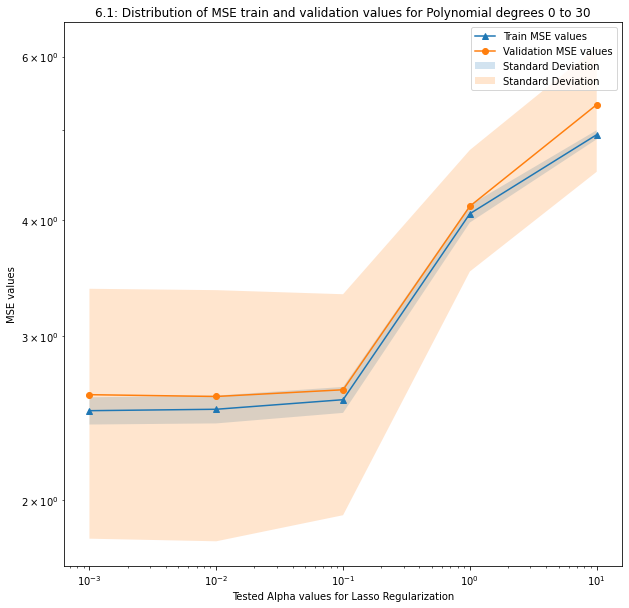

In [23]:
#Plotting the figure

#must convert to numpy for fill_between
mse_val = np.array(mse_val)
mse_train = np.array(mse_train)
mse_val_std = np.array(mse_val_std)
mse_train_std = np.array(mse_train_std)


plt.figure(figsize = (10,10))
plt.plot(alpha, mse_train,'^-' ,label = "Train MSE values")
plt.plot(alpha, mse_val,'o-' ,label = "Validation MSE values")



plt.fill_between(alpha, mse_train + mse_train_std, mse_train - mse_train_std ,label = "Standard Deviation", alpha = 0.2)
plt.fill_between(alpha, mse_val + mse_val_std, mse_val - mse_val_std ,label = "Standard Deviation", alpha = 0.2)

plt.title("6.1: Distribution of MSE train and validation values for Polynomial degrees 0 to 30")
plt.xlabel("Tested Alpha values for Lasso Regularization")
plt.ylabel("MSE values")
plt.yscale("log")
plt.xscale("log")
plt.legend()


**INTERPRETATION:**

**your answer here** Did your  𝐿𝐴𝑆𝑆𝑂  regression model generate any warnings while solving this problem? If so, what was that warning, what did it mean, what steps did you take to address the cause of this warning, and why might it be important to take those steps? (See the NOTE at the bottom of Question 6 for some hints.): 

The Lasso regression gives convergence warnings because it forces some of the predictors, that it determines as unimportant, to converge towards zero. 


<div class='exercise-r'>

**6.2 Find the most significant degrees**

From the previous section, you will now have the `best_alpha` hyperparameter. Now, we will use this best $\alpha$ value to find the "most significant" set of polynomial degrees by using bootstraps.

What we mean by this is, for each bootstrap of the data, you will get some set of degrees that are **significant**, as will be indicated by the value of their coefficients. Typically, while using $LASSO$ regularization, we would consider $\mid\beta_i\mid \gt 0$ as an indication of a particular coefficient's significance. However, for this particular exercise, we are going to use $\mid\beta_i\mid \gt 0.1$ as our criteria for significance (we have found this $0.1$ threshold to work well when designing this particular problem).

Based on this criteria, you will identify which degree coefficients are significant over many bootstrapped iterations with $n=30$ polynomial features and your chosen best $\alpha$ from Question 6.1.

- Use polynomial features with **degree 30**.
- Use a dictionary called `significant_degrees` to store a cumulative count for each degree identified as significant during your bootstraps.
- Run at least 100 bootstraps of your data.
- For each bootstrap:
  - Train a `Lasso(...)` model with the `best_alpha` identified in Question 6.1.
  - Identify the significant polynomial degree coefficients using $\mid\beta_i\mid \gt 0.1 $ as our threshold for significance.
  - For each significant coefficient, update the count of that degree in your `significant_degrees` dictionary.
- Generate a bar plot showing the count for each degree, showing how many times it was identified as significant over your bootstraps.
- Based on this plot, there should likely be a clear maximum degree, above which, few if any iterations have been identified as significant. Interpret your bar plot, choose a maximum degree polynomial based upon it, and explain your rationale for choosing that degree.

</div>

In [24]:
%%capture --no-stdout --no-display

# your code here

best_alpha = 0.01
degree = 30
numboot = 100


significant_degrees = {}

for deg in range(0,degree):        # creating list 1-30
    significant_degrees[deg+1]= 0  #creating the initial key values for the dictionary



for i in range(0,numboot):
    #create Lasso
    lasso_reg = Lasso(alpha = best_alpha, max_iter =20000)
    
    
    # new way to do bootstrapping from pandas
    new_df = df_train.sample(frac = 1, replace = True)
    
    # create parallel universe xtrain, y_train
    xtrain = new_df[["Spreading_factor"]]
    ytrain = new_df["Perc_population"]
    
    #find polynomial features 
    x_poly_train = PolynomialFeatures(degree = 30, include_bias = False).fit_transform(xtrain)
    
    # Fit the model on the transformed train data
    lasso_reg.fit(x_poly_train,ytrain)
    
    
    # Find the coefficients using Lasso
    for deg, value in enumerate(lasso_reg.coef_):  #looping through each 30
        if value > 0.1:
            significant_degrees[deg+1] +=1
        
    


In [25]:
significant_degrees

{1: 100,
 2: 34,
 3: 2,
 4: 76,
 5: 4,
 6: 56,
 7: 4,
 8: 1,
 9: 4,
 10: 0,
 11: 0,
 12: 0,
 13: 0,
 14: 0,
 15: 0,
 16: 0,
 17: 0,
 18: 0,
 19: 0,
 20: 0,
 21: 0,
 22: 0,
 23: 0,
 24: 0,
 25: 0,
 26: 0,
 27: 0,
 28: 0,
 29: 0,
 30: 0}

Text(0.5, 1.0, "Barplot of the count of each degree's significance over 100 Bootstraps")

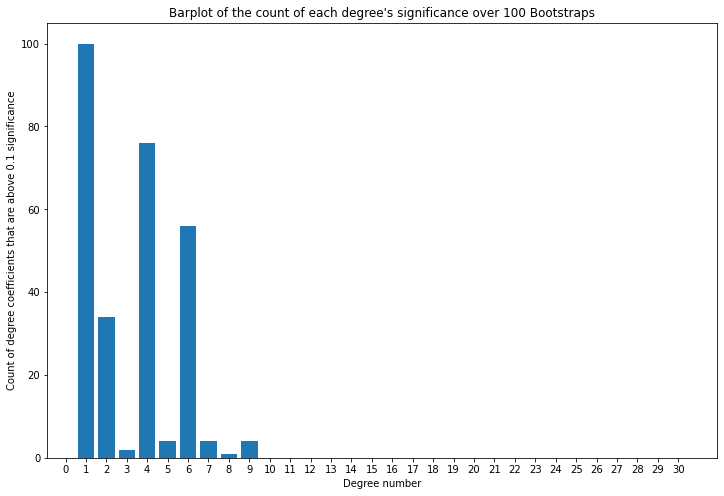

In [26]:
#a bar plot showing the count for each degree, showing how many times it was identified as significant over your bootstraps.
plt.figure(figsize = (12,8))
plt.bar(significant_degrees.keys(), significant_degrees.values())
plt.xticks(np.arange(0,31))
plt.xlabel("Degree number")
plt.ylabel("Count of degree coefficients that are above 0.1 significance")
plt.title("Barplot of the count of each degree's significance over 100 Bootstraps")

**INTERPRETATION:**

**your answer here**
I would choose degree 9 because we have coefficient significance above 0.1 up to degree 9. I would not want to loose any significance so I would need to pick the highest degree value that has any significance.

<div class='exercise-r'>

**6.3 Compute and print the test $MSE$**

From our Question 6.2 results, we can see that only some degrees are consistently significant over many bootstraps. You will now retrain the $L1$ regularized model on the entire **training** data and find the test $MSE$.

- Use polynomial features based on the maximum degree you identified using your results from Question 6.2 (for the sake of simplicity, use all degrees up to that maximum degree as is typically done in polynomial regression).
- Train your **LASSO** regularized model using your `best_alpha` hyper-parameter on the entire training set.
- Generate a plot of the data and your regression curve (similar to [Question 2.1](#part2)).
- Report the polynomial degrees and corresponding coefficients for this fully trained model that have an absolute value greater than 0.1 (i.e. $\mid\beta_i\mid \gt 0.1 $).
- Report the train and test $MSE$ and save the test $MSE$ to `best_mse_dict`.

</div>

In [27]:
# your code here
xtrain = df_train[["Spreading_factor"]]
ytrain = df_train["Perc_population"]

xtest = df_test[["Spreading_factor"]]
ytest = df_test["Perc_population"]

# find polynomial features 
x_poly_train = PolynomialFeatures(degree = 9, include_bias = False).fit_transform(xtrain)

# find polynomial features 
x_poly_test = PolynomialFeatures(degree = 9, include_bias = False).fit_transform(xtest)

# Create Lasso model
lasso_reg = Lasso(alpha = 0.01, max_iter =20000)
lasso_reg.fit(x_poly_train, ytrain)

y_train_pred = lasso_reg.predict(x_poly_train)
y_test_pred = lasso_reg.predict(x_poly_test)

#find the coefficients
coef = lasso_reg.coef_

#find the mse values 
train_mse = mean_squared_error(ytrain, y_train_pred)
test_mse = mean_squared_error(ytest, y_test_pred)

print(f"The train mse value is {train_mse:.3f}")
print(f"The test mse value is {test_mse:.3f}")

best_mse_dict.update({'6.3': test_mse})

#print(best_mse_dict)

for beta, val in enumerate(coef):
    if val > 0.1:
        print(f"The beta value {beta+1} is more significant than 0.1 at a value of {val:.3f}")
        
        # do not want to include beta0 the intercept


The train mse value is 2.551
The test mse value is 2.594
The beta value 1 is more significant than 0.1 at a value of 1.975
The beta value 2 is more significant than 0.1 at a value of 0.591
The beta value 4 is more significant than 0.1 at a value of 0.684


In [28]:
print(best_mse_dict)

{'2.1': 2.6519056545149606, '3.2': 2.6519056545149606, '4.2': 2.61301063735301, '5.3': 2.61301063735301, '6.3': 2.594421570312363}


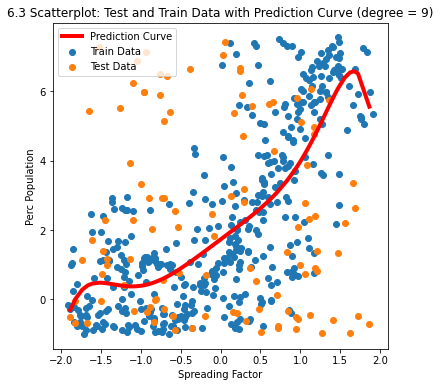

In [29]:
#Plot figure
xtest = df_test[["Spreading_factor"]]
ytest = df_test["Perc_population"]

xtest = xtest.sort_values(['Spreading_factor'])

# find polynomial features 
x_poly_train = PolynomialFeatures(degree = 9, include_bias = False).fit_transform(xtrain)
# find polynomial features 
x_poly_test = PolynomialFeatures(degree = 9, include_bias = False).fit_transform(xtest)

# Create Lasso model
lasso_reg = Lasso(alpha = 0.1, max_iter =20000)
lasso_reg.fit(x_poly_train, ytrain)

y_train_pred = lasso_reg.predict(x_poly_train)
y_test_pred = lasso_reg.predict(x_poly_test)


# Plot degree 9 
plt.figure(figsize = (6,6))
plt.plot(xtest, y_test_pred,'r-', linewidth = 4, label = 'Prediction Curve')
plt.scatter(xtrain, ytrain,label = 'Train Data')
plt.scatter(xtest, ytest, label = 'Test Data')
plt.xlabel("Spreading Factor")
plt.ylabel("Perc Population")
plt.title("6.3 Scatterplot: Test and Train Data with Prediction Curve (degree = 9)")
plt.legend()

<div class='exercise-r'>

**6.4 What are your observations?**

- Compare your `best_degree` from [Question 5](#part5solutions) with your chosen degree in 6.3 above and comment on the difference.
- Compare your test $MSE$ in this question with the result from question 5. Which one is smaller, and by how much?
- Which degree coefficients in your best fit model from 6.3 are significant? If not all coefficients are significant, why?
- Would you expect your current model from 6.3 to be more "reliable" or robust than the models in Question 5 and prior? On what basis would you make a claim of its robustness?

</div>

**your answer here**
In problem 5, the best degree was 8 whereas now the best degree is 9. The difference can be from regularizing the data using the Lasso, which converges 'unimportant' coefficients. I also selected a degree by seeing what degrees had significance. Despite having low significance, degree 9 still showed it which could have been dropped in problem 5. I think it would be more reliable because it chooses the coefficients that are important versus looking at all of them as what was done before. It also does not do the parallel universes which could create wonky data if the sample that was created was not as random or only picked certain points multiple times.


<a id="part7"></a>

## <div class='exercise'>Question 7: Analyze your best test MSEs for each sub section of the homework [6 pts]</div> 

[Return to contents](#contents)


**7.1** Convert the `best_mse_dict` dictionary used to store the best $MSE$ values from each section of the homework into a Pandas dataframe. Generate a bar plot illustrating the $MSE$ values in that dataframe and also display the resulting dataframe.

**7.2** Which model do you think is best, and why? What are some of that model's drawbacks compared to the other models? 

<a id="part7solutions"></a>

## Question 7: Solutions

[Return to contents](#contents)

<div class='exercise-r'>

**7.1** Convert the `best_mse_dict` dictionary used to store the best $MSE$ values from each section of the homework into a Pandas dataframe. Generate a bar plot illustrating the $MSE$ values in that dataframe and also display the resulting dataframe.

</div>

In [30]:
# your code here
best_mse_dict = pd.DataFrame(list(best_mse_dict.items()), columns = ["Models", "MSE values"])
best_mse_dict



,Models,MSE values
0,2.1,2.651906
1,3.2,2.651906
2,4.2,2.613011
3,5.3,2.613011
4,6.3,2.594422


Text(0, 0.5, 'MSE Value')

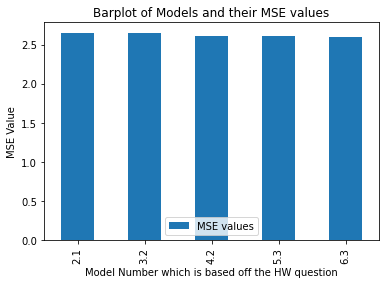

In [31]:
ax = best_mse_dict.plot.bar(x = "Models", y = "MSE values")
ax.set_title("Barplot of Models and their MSE values")
ax.set_xlabel("Model Number which is based off the HW question")
ax.set_ylabel("MSE Value")

<div class='exercise-r'>

**7.2** Which model do you think is best, and why? What are some of that model's drawbacks compared to the other models? 

</div>

**your answer here**
All the models show similar MSE values. The lowest one overall was from 6.3 using lasso to regularize, train, and predict the model. It is the best because as mentioned above it only shows the most important coefficients and punishes the ones that are not seen as important. This model has drawbacks because it may not have a full picture since it reduces the dimensions and we lose some predictors.

#### THE END